### Data Exploration

### Data Exploration

In [1]:
import pandas as pd
data_dataFrame = pd.read_json("train.json")
data_dataFrame.head()
# read data and show 

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [2]:
data_dataFrame.shape
#  data size

(39774, 3)

In [3]:
data_dataFrame.isnull().sum()
#  data null

cuisine        0
id             0
ingredients    0
dtype: int64

In [4]:
# data each describe
data_dataFrame['ingredients'].describe()


count                                                 39774
unique                                                39674
top       [cold water, lime, sugar, sweetened condensed ...
freq                                                      3
Name: ingredients, dtype: object

In [5]:
data_dataFrame['cuisine'].describe()

count       39774
unique         20
top       italian
freq         7838
Name: cuisine, dtype: object

In [6]:
data_dataFrame['id'].describe()

count    39774.000000
mean     24849.536959
std      14360.035505
min          0.000000
25%      12398.250000
50%      24887.000000
75%      37328.500000
max      49717.000000
Name: id, dtype: float64

### Exploratory Visualization

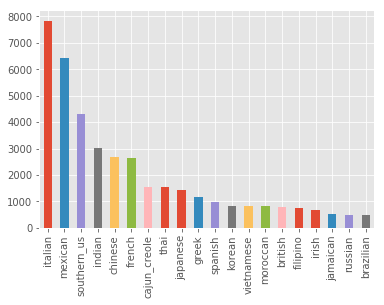

In [7]:
#check each cuisine item count
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
data_dataFrame['cuisine'].value_counts().plot(kind='bar')

In [8]:
data_dataFrame['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [9]:
from collections import Counter
counters = {}
for cuisine in data_dataFrame['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (data_dataFrame['cuisine'] == cuisine)
    for ingredients in data_dataFrame[indices]['ingredients']:
        counters[cuisine].update(ingredients)

In [10]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])


In [11]:
# check top 10 ingredient in each cuisine
top10

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
irish,salt,butter,all-purpose flour,onions,potatoes,sugar,baking soda,baking powder,milk,carrots
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
vietnamese,fish sauce,sugar,salt,garlic,water,carrots,soy sauce,shallots,garlic cloves,vegetable oil
moroccan,salt,olive oil,ground cumin,onions,ground cinnamon,garlic cloves,water,ground ginger,carrots,paprika
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes
japanese,soy sauce,salt,mirin,sugar,water,sake,rice vinegar,vegetable oil,scallions,ginger
british,salt,all-purpose flour,butter,milk,unsalted butter,eggs,sugar,onions,baking powder,large eggs
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper


In [12]:
# check top 10 ingredient in each cuisine
import numpy as np
OneDArrayTop10 = []
OneDArrayTop10 = top10.values.ravel()
len(OneDArrayTop10)

200

In [13]:
# check unique ingredients of top 10
uniqueIngredientArray = np.unique(OneDArrayTop10)
uniqueIngredientArray


array([u'all-purpose flour', u'avocado', u'baking powder', u'baking soda',
       u'black pepper', u'butter', u'buttermilk', u'cachaca',
       u'cajun seasoning', u'carrots', u'cayenne pepper', u'chili powder',
       u'coconut milk', u'corn starch', u'corn tortillas', u'cumin seed',
       u'dried oregano', u'dried thyme', u'eggs',
       u'extra-virgin olive oil', u'feta cheese crumbles', u'fish sauce',
       u'fresh lemon juice', u'fresh lime juice', u'garam masala',
       u'garlic', u'garlic cloves', u'ginger', u'grated parmesan cheese',
       u'green bell pepper', u'green onions', u'ground allspice',
       u'ground black pepper', u'ground cinnamon', u'ground cumin',
       u'ground ginger', u'ground turmeric', u'jalapeno chilies',
       u'large eggs', u'lime', u'milk', u'mirin', u'oil', u'olive oil',
       u'onions', u'paprika', u'pepper', u'potatoes', u'red bell pepper',
       u'rice vinegar', u'sake', u'salt', u'scallions', u'sesame oil',
       u'sesame seeds', u'shallo

In [14]:
len(uniqueIngredientArray)

63

* From the above result, we can see many similar ingredients, based on my google result, I list this can be seens as the same, and I will assign it as same while data preprocessing

    * scallions = Green Onions [1]
    * black pepper = pepper [2]
    * eggs = large eggs [3]
    * extra-virgin olive oil = olive oil [4]
    * garlic = garlic cloves
    
    [1] https://www.thekitchn.com/whats-the-difference-between-spring-onions-scallions-and-green-onions-word-of-mouth-217111
    [2] https://www.chefsteps.com/ingredients/black-pepper
    [3] https://www.thespruceeats.com/egg-size-conversions-1328750
    [4] https://www.thekitchn.com/whats-the-difference-between-olive-oil-and-extra-virgin-olive-oil-word-of-mouth-218767
   

### Data Preprocessing

In [16]:
# assign same ingredient
# Stemmer
# Capitalize
import numpy as np
from nltk.stem import PorterStemmer
porterStemmer = PorterStemmer()
addThis = np.zeros(data_dataFrame.shape[0], dtype = object)
for index,ingredientList in data_dataFrame.iterrows() :
    processedIngredientList=[]
    #addThis = np.zeros(train_data_dataFrame.shape[0])

    for eachIngredient in ingredientList['ingredients']:
        #print eachIngredient
        # scallions = Green Onions
        if eachIngredient == 'green onions':
            eachIngredient='scallions'
        if eachIngredient == 'black pepper':
            eachIngredient='pepper'
        if eachIngredient == 'extra-virgin olive oil':
            eachIngredient = 'olive oil'
        if eachIngredient == 'large eggs':
            eachIngredient = 'eggs'
        if eachIngredient == 'garlic cloves':
            eachIngredient = 'garlic'
        eachIngredient = porterStemmer.stem(eachIngredient)
        eachIngredient = eachIngredient.capitalize()
        processedIngredientList.append(eachIngredient)
    addThis[index] = processedIngredientList
data_dataFrame.insert(3,'processedIngredient', addThis)
    #print train_data_dataFrame.iloc[index]['processedIngredient']

In [17]:
data_dataFrame.head()

,cuisine,id,ingredients,processedIngredient
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...","[Romaine lettuc, Black ol, Grape tomato, Garli..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...","[Plain flour, Ground pepp, Salt, Tomato, Groun..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...","[Egg, Pepper, Salt, Mayonais, Cooking oil, Gre..."
3,indian,22213,"[water, vegetable oil, wheat, salt]","[Water, Vegetable oil, Wheat, Salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...","[Pepper, Shallot, Cornflour, Cayenne pepp, Oni..."


##### After proprocess, check if they work.

In [18]:
from collections import Counter
counters = {}
for cuisine in data_dataFrame['cuisine'].unique():
    counters[cuisine] = Counter()
    indices = (data_dataFrame['cuisine'] == cuisine)
    for ingredients in data_dataFrame[indices]['processedIngredient']:
        counters[cuisine].update(ingredients)

In [19]:
top10_processed = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
            index=[cuisine for cuisine in counters],
            columns=['top{}'.format(i) for i in range(1, 11)])

In [20]:
top10_processed

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
irish,Salt,Butter,All-purpose flour,Egg,Onion,Pepper,Sugar,Potato,Baking soda,Baking powd
mexican,Salt,Garlic,Olive oil,Onion,Ground cumin,Chili powd,Pepper,Jalapeno chili,Sour cream,Avocado
chinese,Soy sauc,Scallion,Garlic,Sesame oil,Salt,Corn starch,Sugar,Water,Vegetable oil,Ginger
filipino,Salt,Garlic,Onion,Water,Soy sauc,Pepper,Oil,Sugar,Carrot,Ground black pepp
vietnamese,Fish sauc,Garlic,Sugar,Salt,Water,Scallion,Carrot,Soy sauc,Shallot,Vegetable oil
moroccan,Olive oil,Salt,Garlic,Ground cumin,Onion,Ground cinnamon,Pepper,Water,Ground ging,Carrot
brazilian,Salt,Garlic,Onion,Olive oil,Lime,Water,Pepper,Cachaca,Egg,Sugar
japanese,Soy sauc,Salt,Scallion,Mirin,Sugar,Water,Sake,Rice vinegar,Garlic,Vegetable oil
british,Salt,Egg,All-purpose flour,Butter,Milk,Unsalted butt,Sugar,Onion,Baking powd,Pepper
greek,Olive oil,Salt,Garlic,Pepper,Dried oregano,Feta cheese crumbl,Fresh lemon juic,Ground black pepp,Feta chees,Cucumb


In [21]:
# check top 10 ingredient in each cuisine
import numpy as np
OneDArrayTop10 = []
OneDArrayTop10 = top10_processed.values.ravel()
len(OneDArrayTop10)

200

In [22]:
# check unique ingredients of top 10
uniqueIngredientArray = np.unique(OneDArrayTop10)
len(uniqueIngredientArray)

57

In [23]:
uniqueIngredientArray

array([u'All-purpose flour', u'Avocado', u'Baking powd', u'Baking soda',
       u'Butter', u'Cachaca', u'Cajun season', u'Carrot', u'Cayenne pepp',
       u'Chili powd', u'Coconut milk', u'Corn starch', u'Cucumb',
       u'Cumin se', u'Dried oregano', u'Dried thym', u'Egg',
       u'Feta chees', u'Feta cheese crumbl', u'Fish sauc',
       u'Fresh lemon juic', u'Fresh lime juic', u'Garam masala', 'Garlic',
       u'Ginger', u'Grated parmesan chees', u'Green bell pepp',
       u'Ground allspic', u'Ground black pepp', u'Ground cinnamon',
       u'Ground cumin', u'Ground ging', u'Ground turmer',
       u'Jalapeno chili', u'Lime', u'Milk', u'Mirin', u'Oil',
       u'Olive oil', u'Onion', 'Pepper', u'Potato', u'Red bell pepp',
       u'Rice vinegar', u'Sake', u'Salt', u'Scallion', u'Sesame oil',
       u'Sesame se', u'Shallot', u'Sour cream', u'Soy sauc', u'Sugar',
       u'Tomato', u'Unsalted butt', u'Vegetable oil', u'Water'],
      dtype=object)

##### CountVectorizer data

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_dataFrame['processedIngredient'] = data_dataFrame['processedIngredient'].map(";".join)
X = cv.fit_transform(data_dataFrame['processedIngredient'])


In [26]:
X.shape

(39774, 2978)

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(data_dataFrame.cuisine)

In [28]:
len(enc.classes_)

20

In [29]:
from sklearn.preprocessing import label_binarize

In [30]:
y = label_binarize(y,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

##### Split data into Training/Validation/Testing data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
X_train

<31819x2978 sparse matrix of type '<type 'numpy.int64'>'
	with 593440 stored elements in Compressed Sparse Row format>

In [40]:
X_test

<7955x2978 sparse matrix of type '<type 'numpy.int64'>'
	with 149302 stored elements in Compressed Sparse Row format>

In [41]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

### Benchmark - SVM

In [45]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
clf_SVM = OneVsRestClassifier(LinearSVC())
params = {
      'estimator__C': [0.5],
      'estimator__tol': [1e-3],
      }
gs_SVM = GridSearchCV(clf_SVM, params, cv=5, scoring='roc_auc')
gs_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__C': [0.5], 'estimator__tol': [0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [47]:
gs_SVM.best_score_

0.9588808890673538

In [48]:
gs_SVM.best_params_

{'estimator__C': 0.5, 'estimator__tol': 0.001}

In [49]:
gs_SVM.predict(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [50]:
gs_SVM.score(X_test,y_test)

0.9611322514031866

### XGBoost

In [51]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
xgb_model = OneVsRestClassifier(XGBClassifier())
parameters = {'estimator__learning_rate': [0.01, 0.1], 'estimator__max_depth': [3, 6]}
gs_XGBoost = GridSearchCV(xgb_model, parameters, scoring='roc_auc')
gs_XGBoost.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          n_jobs=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'estimator__learning_rate': [0.01, 0.1], 'estimator__max_depth': [3, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [56]:
gs_XGBoost.best_score_

0.9588792378994093

In [57]:
gs_XGBoost.best_params_

{'estimator__learning_rate': 0.1, 'estimator__max_depth': 6}

In [58]:
gs_XGBoost.predict(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [59]:
gs_XGBoost.score(X_test,y_test)

0.961491341975562